In [ ]:
## Getting Data from SQLite Database 

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [14]:
import sqlite3

In [15]:
con = sqlite3.connect(r'C:\Users\Pranav\Desktop\PROFILE PROJECTS\Amazon Customer data analysis\database.sqlite') 
# r means raw string, it helps oir sqlite3 package to read the database file efficiently 
# con is connection object or connection engine object

In [16]:
type(con)

sqlite3.Connection

In [17]:
df = pd.read_sql_query("SELECT * FROM REVIEWS", con )
# press shift + tab before you write con , you will understand why we write sql query and con in this line 
# con means we are telling what our connection is 

## Data preperation for analysis

In [18]:
df.shape

(568454, 10)

In [19]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
## Revoming invalid rows

In [20]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [21]:
df['HelpfulnessNumerator']> df['HelpfulnessDenominator']  # invalid rows

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Length: 568454, dtype: bool

In [22]:
df[df['HelpfulnessNumerator']> df['HelpfulnessDenominator']]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...


In [25]:
df_valid = df[df['HelpfulnessNumerator'] <= df['HelpfulnessDenominator']]  #these are valid rows

In [26]:
df_valid.shape  # here 2 rows are less because there are 2 invalid rows

(568452, 10)

In [27]:
df_valid.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [ ]:
# revoming duplicate rows

In [29]:
df_valid.duplicated(['UserId','ProfileName','Time','Text']) 

#the datatype here is boolean , means if we get false[0] then that row is not duplicate but if we get True[1] then it means that row is duplicate

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Length: 568452, dtype: bool

In [31]:
df_valid[df_valid.duplicated(['UserId','ProfileName','Time','Text'])]   # we got 174521 duplicate rows 

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
29,30,B0001PB9FY,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...
574,575,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,2,2,5,1231718400,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh..."
1973,1974,B0017165OG,A2EPNS38TTLZYN,tedebear,0,0,3,1312675200,Pok Chops,The pork chops from Omaha Steaks were very tas...
2309,2310,B0001VWE0M,AQM74O8Z4FMS0,Sunshine,0,0,2,1127606400,Below standard,Too much of the white pith on this orange peel...
2323,2324,B0001VWE0C,AQM74O8Z4FMS0,Sunshine,0,0,2,1127606400,Below standard,Too much of the white pith on this orange peel...
...,...,...,...,...,...,...,...,...,...,...
568409,568410,B0018CLWM4,A2PE0AGWV6OPL7,Dark Water Mermaid,3,3,5,1309651200,Quality & affordable food,I was very pleased with the ingredient quality...
568410,568411,B0018CLWM4,A88HLWDCU57WG,R28,2,2,5,1332979200,litter box,My main reason for the five star review has to...
568411,568412,B0018CLWM4,AUX1HSY8FX55S,DAW,1,1,5,1319500800,Happy Camper,I bought this to try on two registered Maine C...
568412,568413,B0018CLWM4,AVZ2OZ479Q9E8,Ai Ling Chow,0,0,5,1336435200,Two Siberians like it!,When we brought home two 3-month-old purebred ...


In [ ]:
# let's drop these 174521 duplicate rows

In [34]:
data = df_valid.drop_duplicates(subset = ['UserId','ProfileName','Time','Text'])

In [35]:
data.shape  # after dropping we get 393931 rows, means here we dont have any duplicate rows

(393931, 10)

In [37]:
data.dtypes  # object datatype is nothing but string 

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [38]:
# above we can see Time column is 'int64' datatype but we need to convert it into 'datetime' datatype

In [39]:
data['Time']

0         1303862400
1         1346976000
2         1219017600
3         1307923200
4         1350777600
             ...    
568449    1299628800
568450    1331251200
568451    1329782400
568452    1331596800
568453    1338422400
Name: Time, Length: 393931, dtype: int64

In [41]:
pd.to_datetime(data['Time'])  # there is a function in the parameter itself called as unit parameter (shift + tab) and its value by default is nanosecond
                                       # its funtion of the pandas , which helps to convert datatype to datetime datatype
                                       # you can see at the bottom that the dtype is changed to datetime64[ns]
                                       # we got the default dates 

0        1970-01-01 00:00:01.303862400
1        1970-01-01 00:00:01.346976000
2        1970-01-01 00:00:01.219017600
3        1970-01-01 00:00:01.307923200
4        1970-01-01 00:00:01.350777600
                      ...             
568449   1970-01-01 00:00:01.299628800
568450   1970-01-01 00:00:01.331251200
568451   1970-01-01 00:00:01.329782400
568452   1970-01-01 00:00:01.331596800
568453   1970-01-01 00:00:01.338422400
Name: Time, Length: 393931, dtype: datetime64[ns]

In [50]:
data['Time'] = pd.to_datetime(data['Time'], unit='s') # s means seconds , we chose to write unit by pressing shift + tab, we will get to see what parameters we can use
                                                      # we do this to get values in seconds and not nano seconds

In [51]:
data['Time']  # see,  here we get the right time as we shifted from nano seconds(default) to seconds(as per our wish) in the above line , so we get right date 

0        2011-04-27
1        2012-09-07
2        2008-08-18
3        2011-06-13
4        2012-10-21
            ...    
568449   2011-03-09
568450   2012-03-09
568451   2012-02-21
568452   2012-03-13
568453   2012-05-31
Name: Time, Length: 393931, dtype: datetime64[ns]

In [52]:
# above its not an error but a warning we can get rid of it by writing  

import warnings
from warnings import filterwarnings 
filterwarnings('ignore')

# HOW AMAZON RECOMMENDS PRODUCTS

In [ ]:
# Problem statement -  Analyze to what user Amazon can recommend product

In [53]:
data.shape

(393931, 10)

In [55]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [56]:
data['ProfileName']

0                              delmartian
1                                  dll pa
2         Natalia Corres "Natalia Corres"
3                                    Karl
4           Michael D. Bigham "M. Wassir"
                       ...               
568449                   Lettie D. Carter
568450                          R. Sawyer
568451                      pksd "pk_007"
568452            Kathy A. Welch "katwel"
568453                           srfell17
Name: ProfileName, Length: 393931, dtype: object

In [57]:
data['ProfileName'].unique()

array(['delmartian', 'dll pa', 'Natalia Corres "Natalia Corres"', ...,
       'Lettie D. Carter', 'pksd "pk_007"', 'srfell17'], dtype=object)

In [58]:
data['ProfileName'].nunique()   # if we add "n" it will return the count 

218418

In [59]:
data['UserId'].nunique()

256059

In [60]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [61]:
data.groupby(['UserId']).agg({'Summary' : 'count', 'Text': 'count', 'Score' : 'mean' , 'ProductId' : 'count' })

,Summary,Text,Score,ProductId
UserId,,,,
#oc-R103C0QSV1DF5E,1,1,5.000000,1
#oc-R109MU5OBBZ59U,1,1,5.000000,1
#oc-R10LFEMQEW6QGZ,1,1,5.000000,1
#oc-R10LT57ZGIB140,1,1,3.000000,1
#oc-R10UA029WVWIUI,1,1,1.000000,1
...,...,...,...,...
AZZV9PDNMCOZW,3,3,4.666667,3
AZZVNIMTTMJH6,1,1,5.000000,1
AZZY649VYAHQS,1,1,5.000000,1


In [66]:
recommend_df = data.groupby(['UserId']).agg({'Summary' : 'count', 'Text': 'count', 'Score' : 'mean' , 'ProductId' : 'count' }).sort_values(by = 'ProductId' , ascending=False)

In [67]:
recommend_df

,Summary,Text,Score,ProductId
UserId,,,,
AY12DBB0U420B,329,329,4.659574,329
A3OXHLG6DIBRW8,278,278,4.546763,278
A281NPSIMI1C2R,259,259,4.787645,259
A1YUL9PCJR3JTY,214,214,4.621495,214
A1Z54EM24Y40LL,211,211,4.383886,211
...,...,...,...,...
A2E80MDB9TCNGW,1,1,3.000000,1
A2E80RT3HOR35T,1,1,5.000000,1
A2E816C5N51F6X,1,1,5.000000,1


In [ ]:
#To change the column name 



In [70]:
recommend_df.columns = ['Number _of_summaries' , 'num_text' , 'avg_score' , 'no_of_products_purchased']

In [71]:
recommend_df

,Number _of_summaries,num_text,avg_score,no_of_products_purchased
UserId,,,,
AY12DBB0U420B,329,329,4.659574,329
A3OXHLG6DIBRW8,278,278,4.546763,278
A281NPSIMI1C2R,259,259,4.787645,259
A1YUL9PCJR3JTY,214,214,4.621495,214
A1Z54EM24Y40LL,211,211,4.383886,211
...,...,...,...,...
A2E80MDB9TCNGW,1,1,3.000000,1
A2E80RT3HOR35T,1,1,5.000000,1
A2E816C5N51F6X,1,1,5.000000,1


In [77]:
recommend_df.head(10)

,Number _of_summaries,num_text,avg_score,no_of_products_purchased
UserId,,,,
AY12DBB0U420B,329,329,4.659574,329
A3OXHLG6DIBRW8,278,278,4.546763,278
A281NPSIMI1C2R,259,259,4.787645,259
A1YUL9PCJR3JTY,214,214,4.621495,214
A1Z54EM24Y40LL,211,211,4.383886,211
A2MUGFV2TDQ47K,161,161,3.826087,161
A3D6OI36USYOU1,146,146,4.417808,146
AZV26LP92E6WU,129,129,4.852713,129
AKMEY1BSHSDG7,119,119,4.747899,119


In [78]:
recommend_df.index[0:10]        # ".head" will give you full table values and ".index" will give you index values(basically index columns of the table)

Index(['AY12DBB0U420B', 'A3OXHLG6DIBRW8', 'A281NPSIMI1C2R', 'A1YUL9PCJR3JTY',
       'A1Z54EM24Y40LL', 'A2MUGFV2TDQ47K', 'A3D6OI36USYOU1', 'AZV26LP92E6WU',
       'AKMEY1BSHSDG7', 'A2GEZJHBV92EVR'],
      dtype='object', name='UserId')

In [81]:
recommend_df['no_of_products_purchased'][0:10]

UserId
AY12DBB0U420B     329
A3OXHLG6DIBRW8    278
A281NPSIMI1C2R    259
A1YUL9PCJR3JTY    214
A1Z54EM24Y40LL    211
A2MUGFV2TDQ47K    161
A3D6OI36USYOU1    146
AZV26LP92E6WU     129
AKMEY1BSHSDG7     119
A2GEZJHBV92EVR    118
Name: no_of_products_purchased, dtype: int64

In [83]:
recommend_df['no_of_products_purchased'][0:10].values   #by writing .array we will get in the form of array

array([329, 278, 259, 214, 211, 161, 146, 129, 119, 118], dtype=int64)

<BarContainer object of 10 artists>

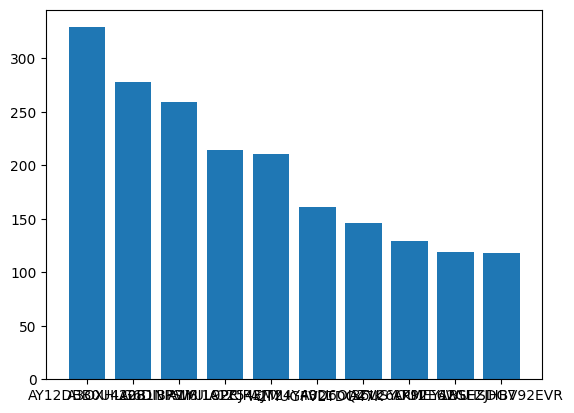

In [85]:
plt.bar(x = recommend_df.index[0:10] , height = recommend_df['no_of_products_purchased'][0:10].values)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'AY12DBB0U420B'),
  Text(1, 0, 'A3OXHLG6DIBRW8'),
  Text(2, 0, 'A281NPSIMI1C2R'),
  Text(3, 0, 'A1YUL9PCJR3JTY'),
  Text(4, 0, 'A1Z54EM24Y40LL'),
  Text(5, 0, 'A2MUGFV2TDQ47K'),
  Text(6, 0, 'A3D6OI36USYOU1'),
  Text(7, 0, 'AZV26LP92E6WU'),
  Text(8, 0, 'AKMEY1BSHSDG7'),
  Text(9, 0, 'A2GEZJHBV92EVR')])

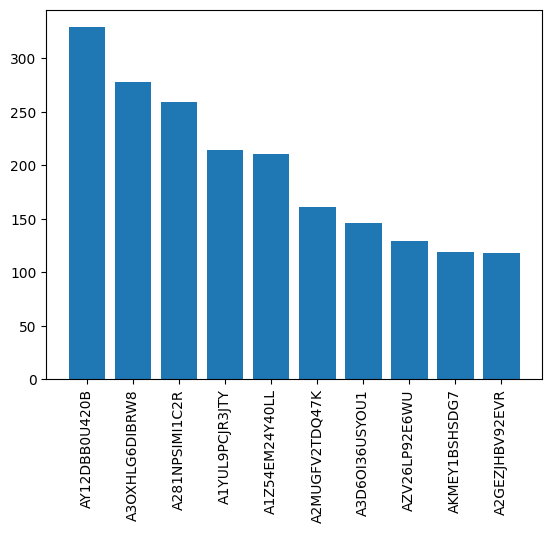

In [88]:
#the names are getting overlapped so we use this
plt.bar(x = recommend_df.index[0:10] , height = recommend_df['no_of_products_purchased'][0:10].values)
plt.xticks(rotation = 'vertical')      # names of the x asix will change to vertical alignment 

# ANALYSING WHICH PRODUCT HAS GOOD NUMBER OF REVIEWS [EDA]

In [89]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [91]:
len(data['ProductId'].unique())  # 67624 types of products in our data

67624

In [ ]:
# we will see frequent sold product which has good number of reviews
# any product sold more than 600 times then we will consider it as frequent sold product
# any product sold more than 500 times then we will consider it as most sold product 

In [93]:
data['ProductId'].value_counts()

B007JFMH8M    912
B002QWP89S    630
B003B3OOPA    622
B001EO5Q64    566
B0013NUGDE    558
             ... 
B002DNX4GO      1
B000FM2YU2      1
B001M1VA32      1
B009858H6M      1
B001LR2CU2      1
Name: ProductId, Length: 67624, dtype: int64

In [95]:
# To convert it into dataframe we use .to_frame() function
# prod_count is a data frame here
prod_count = data['ProductId'].value_counts().to_frame()


# .value_counts(): This method counts the occurrences of each unique value in the 'ProductId' column.....
# returning a Pandas Series where the unique values are the index and the counts are the values.

In [96]:
prod_count

,ProductId
B007JFMH8M,912
B002QWP89S,630
B003B3OOPA,622
B001EO5Q64,566
B0013NUGDE,558
...,...
B002DNX4GO,1
B000FM2YU2,1
B001M1VA32,1
B009858H6M,1


In [97]:
prod_count['ProductId']>500

B007JFMH8M     True
B002QWP89S     True
B003B3OOPA     True
B001EO5Q64     True
B0013NUGDE     True
              ...  
B002DNX4GO    False
B000FM2YU2    False
B001M1VA32    False
B009858H6M    False
B001LR2CU2    False
Name: ProductId, Length: 67624, dtype: bool

In [98]:
prod_count[prod_count['ProductId']>500] 

# In the expression prod_count[prod_count['ProductId'] > 500], prod_count is a Pandas DataFrame, and the part before the brackets (prod_count) refers to the entire DataFrame.... 
# The brackets are used for indexing and filtering the DataFrame based on a specific condition.

,ProductId
B007JFMH8M,912
B002QWP89S,630
B003B3OOPA,622
B001EO5Q64,566
B0013NUGDE,558
B000KV61FC,556
B000UBD88A,542
B000NMJWZO,542
B005K4Q37A,541
B0090X8IPM,530


In [100]:
freq_prod_id  = prod_count[prod_count['ProductId']>500].index  

# freq_prod_id is a variable here
# So, freq_prod_id will be a variable containing the index values (see below) of the rows in the prod_count DataFrame where the count of the corresponding product ID is greater than 500. 

In [101]:
freq_prod_id

Index(['B007JFMH8M', 'B002QWP89S', 'B003B3OOPA', 'B001EO5Q64', 'B0013NUGDE',
       'B000KV61FC', 'B000UBD88A', 'B000NMJWZO', 'B005K4Q37A', 'B0090X8IPM',
       'B005ZBZLT4'],
      dtype='object')

In [102]:
data['ProductId'].isin(freq_prod_id)    # data is the dataframe

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Name: ProductId, Length: 393931, dtype: bool

In [103]:
freq_prod_df = data[data['ProductId'].isin(freq_prod_id)]  # freq_prod_df is the variable here

# data['ProductId']: This extracts the 'ProductId' column from the DataFrame data.
# .isin(freq_prod_id)] : This method checks for each element in the 'ProductId' column whether it is present in the list freq_prod_id... 
# It returns a boolean Series of the same length as the original column.... 
# where each element is True if the corresponding 'ProductId' is in freq_prod_id and False otherwise.

In [104]:
freq_prod_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
20982,20983,B002QWP89S,A21U4DR8M6I9QN,"K. M Merrill ""justine""",1,1,5,2011-10-18,addictive! but works for night coughing in dogs,my 12 year old sheltie has chronic brochotitis...
20983,20984,B002QWP89S,A17TDUBB4Z1PEC,jaded_green,1,1,5,2011-10-14,genuine Greenies best price,"These are genuine Greenies product, not a knoc..."
20984,20985,B002QWP89S,ABQH3WAWMSMBH,tenisbrat87,1,1,5,2011-09-28,Perfect for our little doggies,"Our dogs love Greenies, but of course, which d..."
20985,20986,B002QWP89S,AVTY5M74VA1BJ,tarotqueen,1,1,5,2011-09-24,dogs love greenies,"What can I say, dogs love greenies. They begg ..."
20986,20987,B002QWP89S,A13TNN54ZEAUB1,dcz2221,1,1,5,2011-09-23,Greenies review,This review is for a box of Greenies Lite for ...
...,...,...,...,...,...,...,...,...,...,...
563878,563879,B007JFMH8M,A366PSH7KFLRPB,TheRosySnail,0,0,5,2012-07-29,Yummy!,I loved these cookies and so did my kids. You ...
563879,563880,B007JFMH8M,A2KV6EYQPKJRR5,Kelley,0,0,5,2012-07-28,Quaker Soft Baked Cookies,This is a great tasting cookie. It is very sof...
563880,563881,B007JFMH8M,A3O7REI0OSV89M,Esme,0,0,4,2012-07-28,Delicious!,These are great for a quick snack! They are sa...
563881,563882,B007JFMH8M,A9JS5GQQ6GIQT,Syne,0,0,5,2012-07-28,yummy,I love the Quaker soft baked cookies. The rea...


In [105]:
freq_prod_df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

<AxesSubplot: xlabel='count', ylabel='ProductId'>

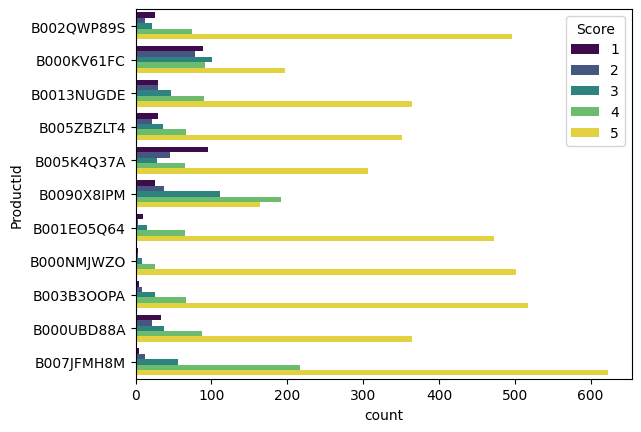

In [110]:
sns.countplot(y = 'ProductId' , data = freq_prod_df, palette='viridis' , hue = 'Score')

<AxesSubplot: xlabel='count', ylabel='ProductId'>

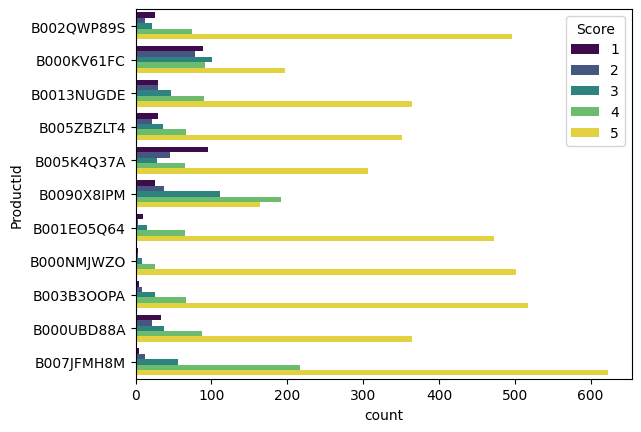

In [114]:
sns.countplot(y = 'ProductId' , data = freq_prod_df  , palette='viridis' , hue = 'Score')   
# in countplot its either x or y , it cannot be both , so we wrote x and instead of y we wrote data

# UNDERSTANDING BEHAVIOURS OF AMAZON USERS 

In [ ]:
# Is there any difference between behaviour of frequent viewers and non frequent viewers 

In [115]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [119]:
x = data['UserId'].value_counts()  # means - this particular user has got this many products

In [120]:
x

AY12DBB0U420B     329
A3OXHLG6DIBRW8    278
A281NPSIMI1C2R    259
A1YUL9PCJR3JTY    214
A1Z54EM24Y40LL    211
                 ... 
AAQPR1MSRXKTU       1
AGO81Z6PZSF7P       1
ALA84XWMTQBFT       1
A1G9DK8EUR36JC      1
A3LGQPJCZVL9UC      1
Name: UserId, Length: 256059, dtype: int64

In [118]:
data.head(7)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,2012-07-12,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,2012-06-20,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...


In [141]:
data['UserId'].apply(lambda user : "Frequent Buyer" if x[user]>50 else "Not Frequent")

0         Not Frequent
1         Not Frequent
2         Not Frequent
3         Not Frequent
4         Not Frequent
              ...     
568449    Not Frequent
568450    Not Frequent
568451    Not Frequent
568452    Not Frequent
568453    Not Frequent
Name: UserId, Length: 393931, dtype: object

In [123]:
data['Viewer Type'] = data['UserId'].apply(lambda user : "Frequent Buyer" if x[user]>50 else "Not Frequent")   

# data['Viewer Type']: This creates a new column called 'Viewer Type' in the DataFrame data and assigns the values based on the conditions specified.

# x is a series, in this series if each of the user has count greater than 50 then we will insert Frequent Buyer

# lambda is oftenly called as anonymous function (coz this function doesn't have any body) 

# By using the apply function along with a lambda function to create a new column in a Pandas DataFrame based on a condition related to the count of a user's occurrences.

# This is a lambda (anonymous) function that takes a user as input and returns "Frequent Buyer" if the count of occurrences for that user (presumably stored in the variable x) is greater than 50

#and "Not Frequent" otherwise.

In [124]:
data['Viewer Type']

0         Not Frequent
1         Not Frequent
2         Not Frequent
3         Not Frequent
4         Not Frequent
              ...     
568449    Not Frequent
568450    Not Frequent
568451    Not Frequent
568452    Not Frequent
568453    Not Frequent
Name: Viewer Type, Length: 393931, dtype: object

In [125]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Viewer Type
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,Not Frequent
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,Not Frequent


In [ ]:
# just to cross check 

In [126]:
data['Viewer Type'].unique()

array(['Not Frequent', 'Frequent Buyer'], dtype=object)

In [175]:
data['Viewer Type'] == 'Not Frequent'

0         True
1         True
2         True
3         True
4         True
          ... 
568449    True
568450    True
568451    True
568452    True
568453    True
Name: Viewer Type, Length: 393931, dtype: bool

In [135]:
not_freq_df = data[data['Viewer Type'] == 'Not Frequent']
freq_df = data[data['Viewer Type'] == 'Frequent Buyer']

In [136]:
freq_df['Score'].value_counts()

5    5765
4    1979
3     897
2     368
1     349
Name: Score, dtype: int64

<AxesSubplot: >

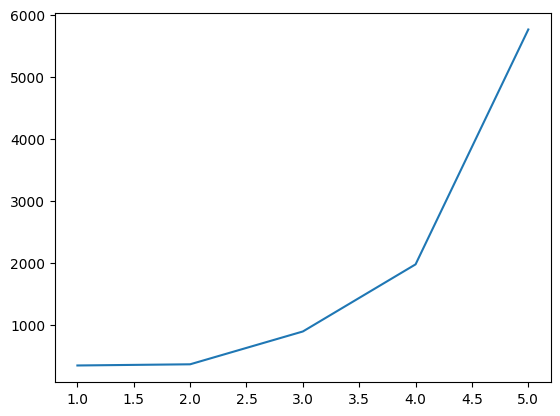

In [137]:
freq_df['Score'].value_counts().plot() 
# if we write plot we get default bar chart

<AxesSubplot: >

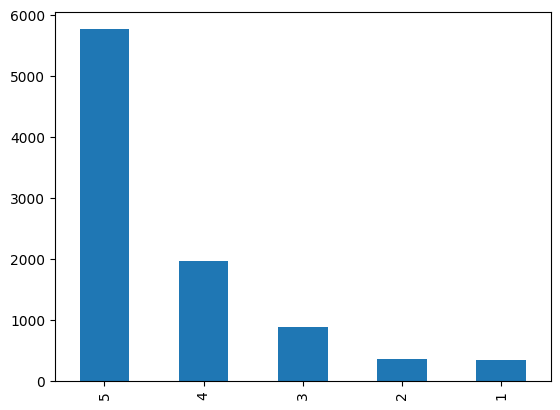

In [139]:
freq_df['Score'].value_counts().plot(kind = 'bar')

<AxesSubplot: >

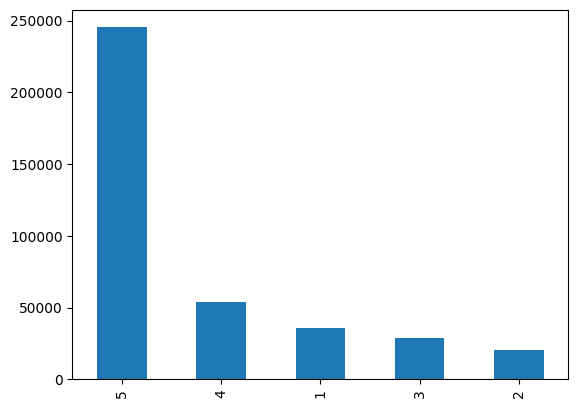

In [140]:
not_freq_df['Score'].value_counts().plot(kind = 'bar')

# Analyzing the Frequent Users

In [ ]:
# prb statement - are frequent users more verbose

In [142]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'Viewer Type'],
      dtype='object')

In [144]:
data['Text']

0         I have bought several of the Vitality canned d...
1         Product arrived labeled as Jumbo Salted Peanut...
2         This is a confection that has been around a fe...
3         If you are looking for the secret ingredient i...
4         Great taffy at a great price.  There was a wid...
                                ...                        
568449    Great for sesame chicken..this is a good if no...
568450    I'm disappointed with the flavor. The chocolat...
568451    These stars are small, so you can give 10-15 o...
568452    These are the BEST treats for training and rew...
568453    I am very satisfied ,product is as advertised,...
Name: Text, Length: 393931, dtype: object

In [146]:
data[['UserId', 'ProductId' , 'Text']]

,UserId,ProductId,Text
0,A3SGXH7AUHU8GW,B001E4KFG0,I have bought several of the Vitality canned d...
1,A1D87F6ZCVE5NK,B00813GRG4,Product arrived labeled as Jumbo Salted Peanut...
2,ABXLMWJIXXAIN,B000LQOCH0,This is a confection that has been around a fe...
3,A395BORC6FGVXV,B000UA0QIQ,If you are looking for the secret ingredient i...
4,A1UQRSCLF8GW1T,B006K2ZZ7K,Great taffy at a great price. There was a wid...
...,...,...,...
568449,A28KG5XORO54AY,B001EO7N10,Great for sesame chicken..this is a good if no...
568450,A3I8AFVPEE8KI5,B003S1WTCU,I'm disappointed with the flavor. The chocolat...
568451,A121AA1GQV751Z,B004I613EE,"These stars are small, so you can give 10-15 o..."
568452,A3IBEVCTXKNOH,B004I613EE,These are the BEST treats for training and rew...


In [147]:
data['Text'][0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [149]:
type(data['Text'][0])  # to know what is the datatype

str

In [150]:
type(data['Text'][0].split(' '))

list

In [152]:
len(data['Text'][0].split(' ') )    # Here len will tell us how many words are there in the statement

49

In [148]:
data['Text'][0].split(' ')      

['I',
 'have',
 'bought',
 'several',
 'of',
 'the',
 'Vitality',
 'canned',
 'dog',
 'food',
 'products',
 'and',
 'have',
 'found',
 'them',
 'all',
 'to',
 'be',
 'of',
 'good',
 'quality.',
 'The',
 'product',
 'looks',
 'more',
 'like',
 'a',
 'stew',
 'than',
 'a',
 'processed',
 'meat',
 'and',
 'it',
 'smells',
 'better.',
 'My',
 'Labrador',
 'is',
 'finicky',
 'and',
 'she',
 'appreciates',
 'this',
 'product',
 'better',
 'than',
 '',
 'most.']

In [160]:
def calculate_length(text):                 # we are defining a python function called 'calculate_length' 
  return len(text.split(' '))

In [155]:
data['Text_length'] = data['Text'].apply(calculate_length)

In [156]:
data['Text_length']

0         49
1         31
2         99
3         43
4         30
          ..
568449    26
568450    46
568451    71
568452    37
568453    21
Name: Text_length, Length: 393931, dtype: int64

In [158]:
not_freq_data = data[data['Viewer Type'] == 'Not Frequent']
freq_data = data[data['Viewer Type'] == 'Frequent Buyer']

In [159]:
not_freq_data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Viewer Type,Text_length
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent,49
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent,31
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent,99
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,Not Frequent,43
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,Not Frequent,30
...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,2011-03-09,Will not do without,Great for sesame chicken..this is a good if no...,Not Frequent,26
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,2012-03-09,disappointed,I'm disappointed with the flavor. The chocolat...,Not Frequent,46
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,2012-02-21,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",Not Frequent,71
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,2012-03-13,Favorite Training and reward treat,These are the BEST treats for training and rew...,Not Frequent,37


In [ ]:
# Let's create boxplot 

(0.0, 600.0)

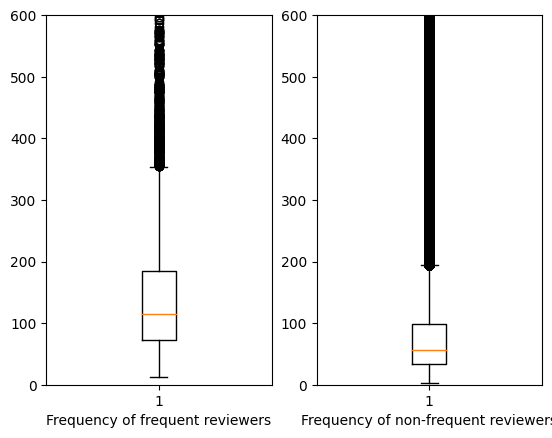

In [172]:
fig = plt.figure()

# For frequent users 
ax1 = fig.add_subplot(121)                             # 121 is index of box plot 
ax1.boxplot(freq_data['Text_length'])                  # plotting boxplot for frequent users 
ax1.set_xlabel('Frequency of frequent reviewers') 
ax1.set_ylim(0, 600)                                   # The parameters 0 and 600 are the lower and upper limits 

# Non frequent users
ax2 = fig.add_subplot(122)
ax2.boxplot(not_freq_data['Text_length']) 
ax2.set_xlabel('Frequency of non-frequent reviewers') 
ax2.set_ylim(0, 600)

# SENTIMENT ANALYSIS 

In [ ]:
# IMPORTANT - Oftenly the sentiment value is denoted by polarity value which is between -1 to +1

# More the sentiment is close to zero the higher the chances that sentiment is neutral
# More close to +1 then it means it has positive sentiment
# if in the range of -1 to 0 it means it has negative sentiment 

In [176]:
!pip install textblob

     -------------------------------------- 636.8/636.8 KB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 2.7 MB/s eta 0:00:00
     -------------------------------------- 269.5/269.5 KB 4.2 MB/s eta 0:00:00
     ---------------------------------------- 78.3/78.3 KB 2.2 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\Pranav\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [178]:
from textblob import TextBlob

In [179]:
data['Summary']

0                      Good Quality Dog Food
1                          Not as Advertised
2                      "Delight" says it all
3                             Cough Medicine
4                                Great taffy
                         ...                
568449                   Will not do without
568450                          disappointed
568451              Perfect for our maltipoo
568452    Favorite Training and reward treat
568453                           Great Honey
Name: Summary, Length: 393931, dtype: object

In [180]:
data['Summary'][0]

'Good Quality Dog Food'

In [182]:
TextBlob("Good Quality Dog Food").sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

In [183]:
TextBlob("Good Quality Dog Food").sentiment.polarity  # we need to apply the same idea to each row of the summary column 

0.7

In [184]:
data.shape

(393931, 12)

In [186]:
sample = data[0:50000]   

In [203]:
polarity = []                                            # lets store the polarity values in a list

for text in sample['Summary']:                           # means text of the 0 to 50000 rows(sample function - see upper line) of the Summary column 
   try: 
     polarity.append(TextBlob(text).sentiment.polarity)  # "append()" is convenient for concatenating rows , to concatenate columns, the "concat()" function is more suitable.
   except:
     polarity.append(0)                                  # there can be some missing , blank values or their can be exceptions , so here we use exception handling in python

In [189]:
len(polarity)

50000

In [ ]:
sample['polarity']

In [190]:
sample['polarity'] = polarity   # we assign polarity value inside polarity feature

In [191]:
sample.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Viewer Type,Text_length,polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent,49,0.7
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent,31,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent,99,0.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,Not Frequent,43,0.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,Not Frequent,30,0.8


In [195]:
sample_negative = sample[sample['polarity']<0]

sample_positive = sample[sample['polarity']>0]

In [196]:
sample_negative['Summary']

16                  poor taste
26             Nasty No flavor
57       How can you go wrong!
61            pretty expensive
62              stale product.
                 ...          
54185                 Horrible
54186            Horrible idea
54191                    STALE
54212             Disappointed
54251      Just not very good!
Name: Summary, Length: 4659, dtype: object

In [197]:
sample_positive['Summary']

0                                Good Quality Dog Food
4                                          Great taffy
5                                           Nice Taffy
6        Great!  Just as good as the expensive brands!
7                               Wonderful, tasty taffy
                             ...                      
54248                 My favorite nescafe dolce flavor
54249                                  My 2nd Favorite
54250                      Best of 5 flavors available
54252                                 pricey but good.
54253                         Best I have found so far
Name: Summary, Length: 29155, dtype: object

In [198]:
from collections import Counter

In [200]:
Counter(sample_negative['Summary']).most_common(10)

[('Disappointed', 44),
 ('Disappointing', 32),
 ('Bland', 18),
 ('Awful', 17),
 ('Not what I expected', 17),
 ('Terrible', 15),
 ('Horrible', 15),
 ('disappointed', 15),
 ('Disgusting', 12),
 ('not good', 11)]

In [202]:
Counter(sample_positive['Summary']).most_common(10)

[('Delicious!', 208),
 ('Delicious', 204),
 ('Great product', 100),
 ('Excellent', 85),
 ('Love it!', 81),
 ('Great', 81),
 ('Great Product', 77),
 ('Great!', 70),
 ('Good stuff', 51),
 ('Awesome', 50)]

# DONE